In [10]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [11]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x213990c0dd0>)

In [12]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [17]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [18]:
fig = px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.3)
fig.show()

In [19]:
fig = px.histogram(medical_df,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI')
fig.update_layout(bargap=0.3)
fig.show()

In [20]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','gray'],title='Annual Charges Distribution')
fig.update_layout(bargap=0.3)
fig.show()

In [21]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='sex',color_discrete_sequence=['pink','blue'],title='Annual Charges Distribution')
fig.update_layout(bargap=0.3)
fig.show()

In [22]:
fig = px.histogram(medical_df,x='charges',marginal='box',color='region',color_discrete_sequence=['red','blue','green','yellow'],title='Annual Charges Distribution')
fig.update_layout(bargap=0.3)
fig.show()

In [23]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [24]:
px.histogram(medical_df,x='smoker',color='sex',color_discrete_sequence=['pink','blue'],title='Smoker')

In [25]:
px.histogram(medical_df,x='sex',title='Sex')

In [26]:
px.histogram(medical_df,x='region',title='Region')

In [27]:
fig = px.histogram(medical_df,x='children',title='Children')
fig.update_layout(bargap = 0.1)
fig.show()

In [28]:
fig = px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='Age vs.Charges')
fig.update_traces(marker_size=5)
fig.show()

In [29]:
fig = px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='BMI vs.Charges')
fig.update_traces(marker_size=5)
fig.show()

In [30]:
fig = px.violin(medical_df,x='sex',y='charges',color='smoker',hover_data=['sex'],title='Sex vs.Charges')
fig.update_traces(marker_size=5)
fig.show()

In [31]:
fig = px.violin(medical_df,x='region',y='charges',color='smoker',hover_data=['sex'],title='Region vs.Charges')
fig.update_traces(marker_size=5)
fig.show()

In [32]:
fig = px.violin(medical_df,x='children',y='charges',hover_data=['sex'],title='Children vs.Charges')
fig.update_traces(marker_size=5)
fig.show()

In [33]:
fig = px.violin(medical_df,x='smoker',y='charges',hover_data=['sex'],title='Smoker vs.Charges')
fig.update_traces(marker_size=5)
fig.show()

In [34]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [35]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362878)

In [36]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790469)

In [37]:
smoker_values = {'no': 0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984782)

In [38]:
type(medical_df)

pandas.core.frame.DataFrame

In [39]:
print(medical_df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [40]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

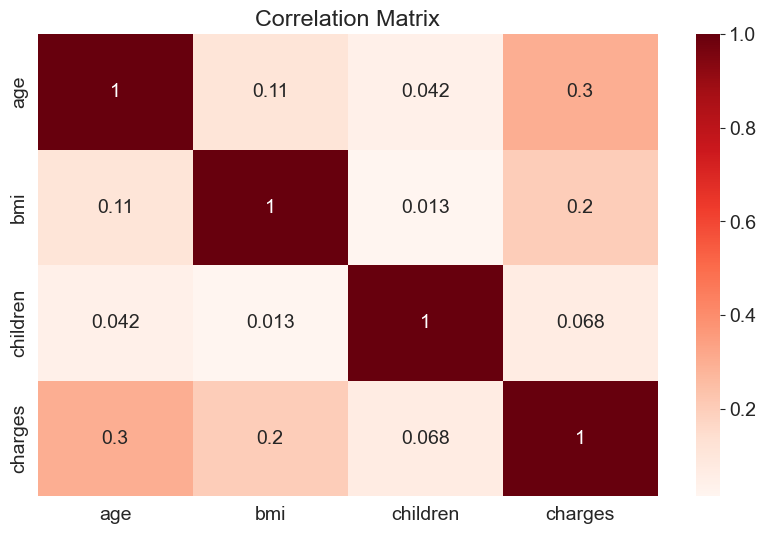

In [41]:
sns.heatmap(medical_df.select_dtypes(include='number').corr(), cmap='Reds',annot=True)
plt.title('Correlation Matrix')

In [42]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

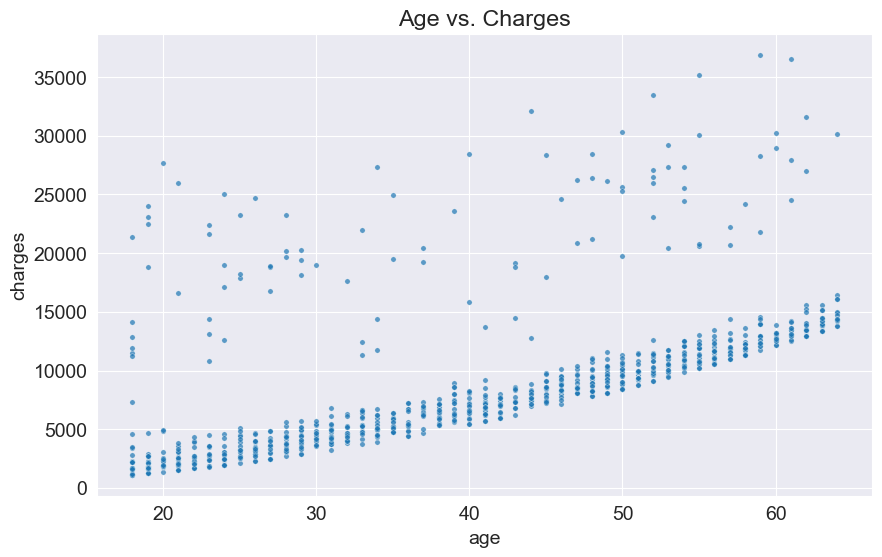

In [43]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)


In [44]:
def estimate_charges(age, w, b):
    return w * age + b

In [45]:
w=50
b=100
estimate_charges(30 ,w, b)

1600

In [46]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [47]:
estimated_charges = estimate_charges(ages ,w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [48]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

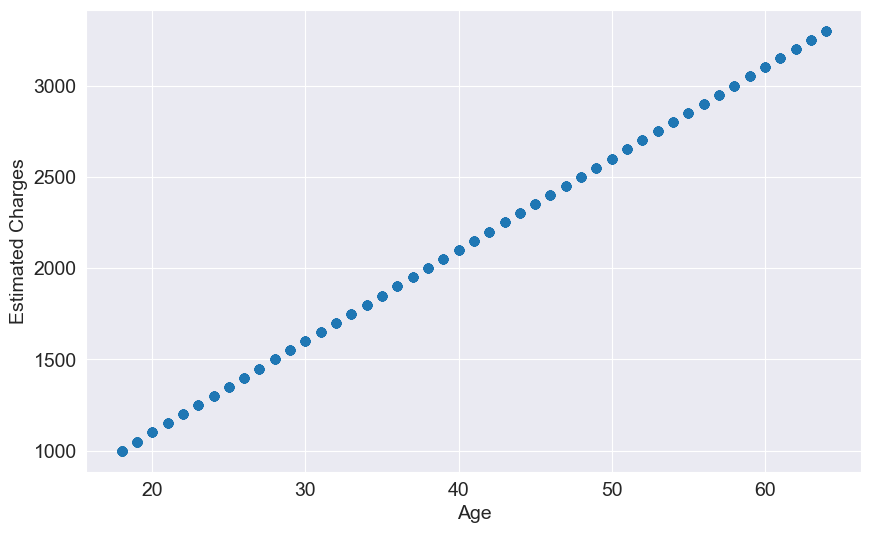

In [49]:
plt.scatter(ages,estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

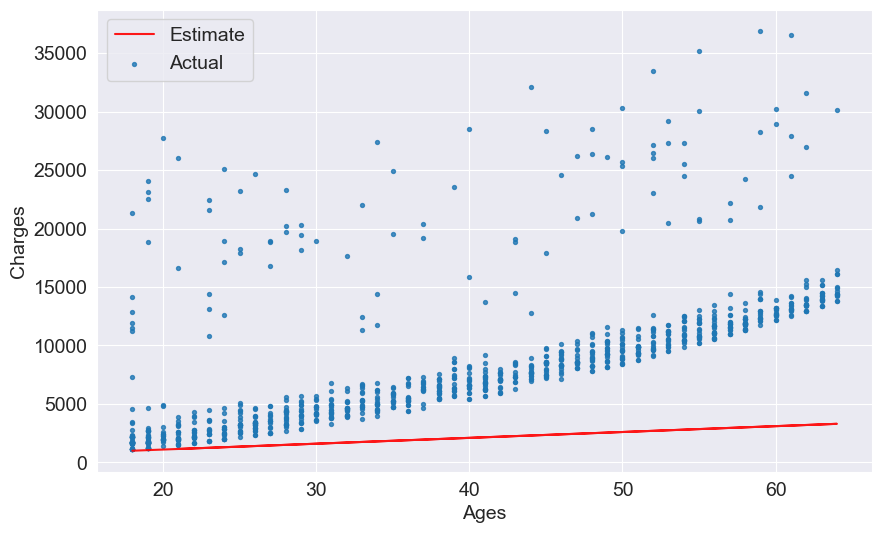

In [50]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages,target, s=8, alpha=0.8)
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

In [51]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, w, b)
    target = non_smoker_df.charges
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages,target, s=8, alpha=0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])

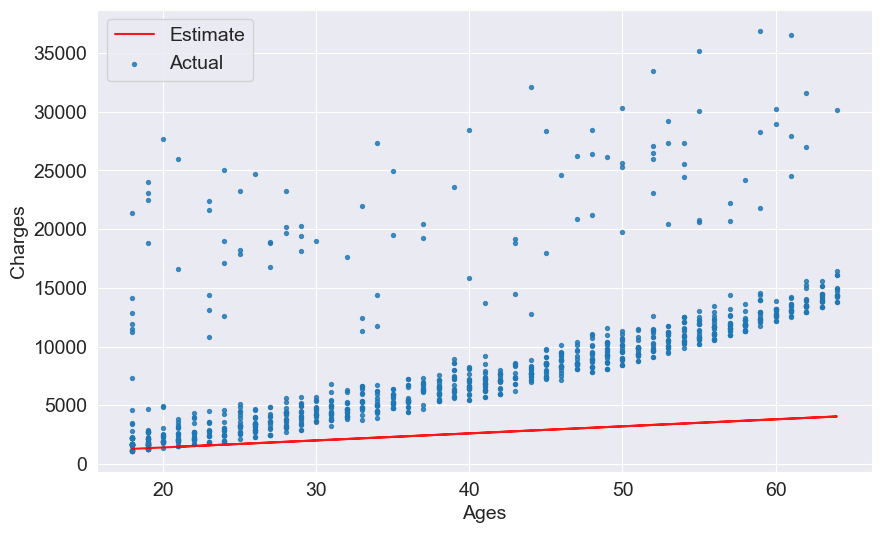

In [52]:
try_parameters(60,200)

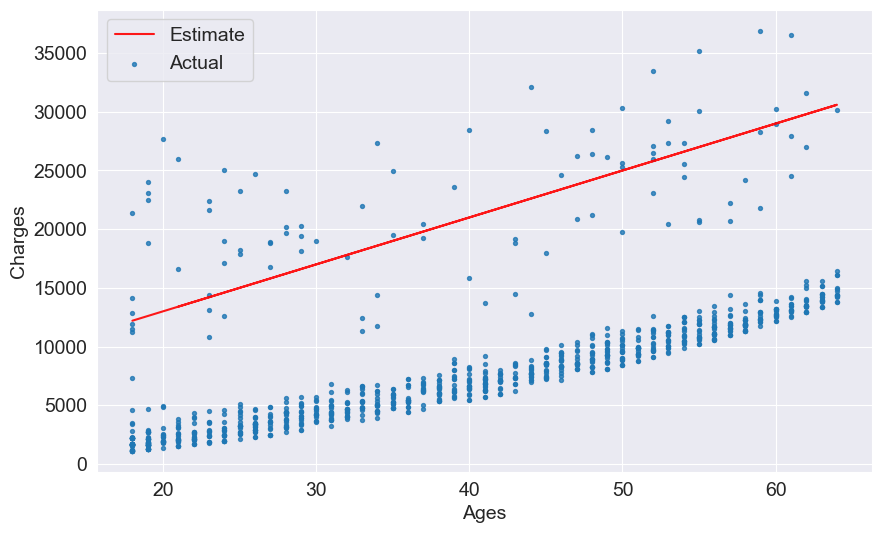

In [53]:
try_parameters(400,5000)

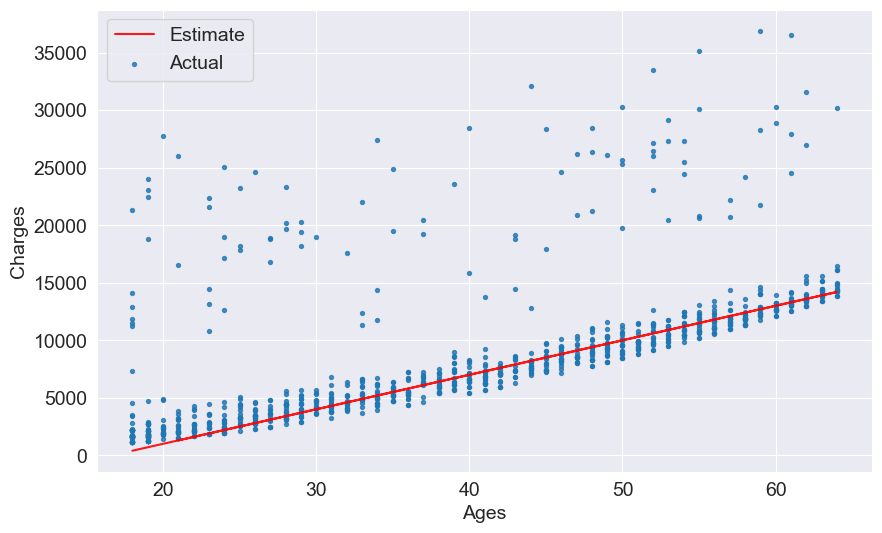

In [54]:
try_parameters(300,-5000)

In [55]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [56]:
predictions = estimated_charges
predictions


1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [57]:
import numpy as np


In [58]:
def rsme(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [59]:
w=300
b=-5000

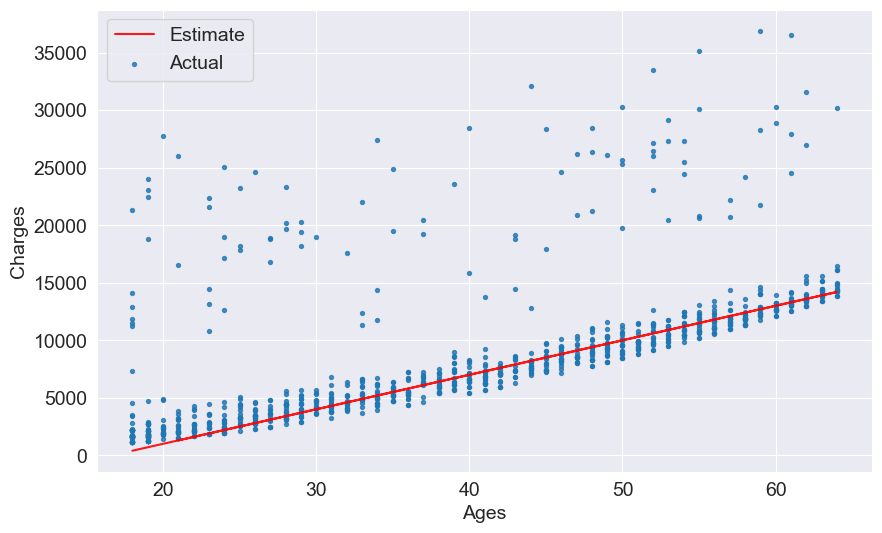

In [60]:
try_parameters(w,b)

In [61]:
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age, w, b)

In [62]:
rsme(targets, predicted)

np.float64(4956.973980899423)

In [63]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    target = non_smoker_df.charges
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages,target, s=8, alpha=0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])

    loss = rsme(target, predictions)
    print("RSME Loss:", loss)

RSME Loss: 4956.973980899423


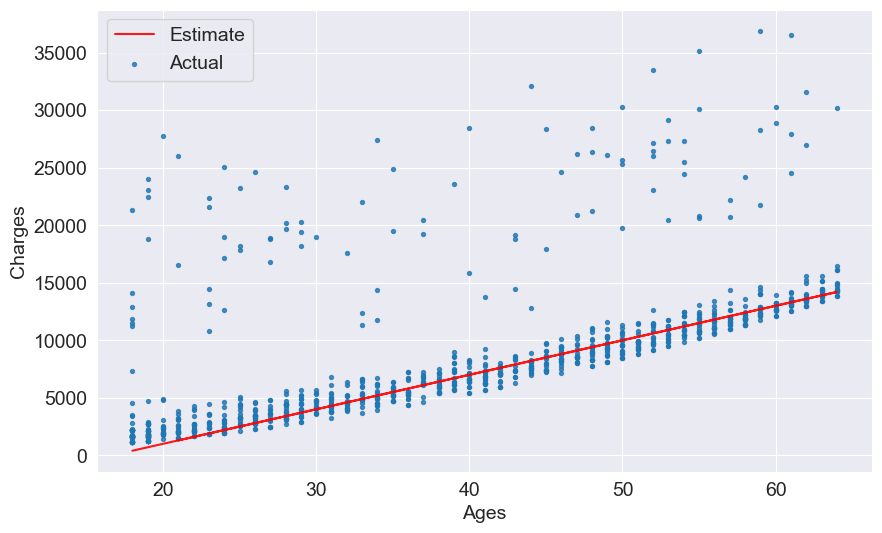

In [64]:
try_parameters(300,-5000)

RSME Loss: 4991.993804156943


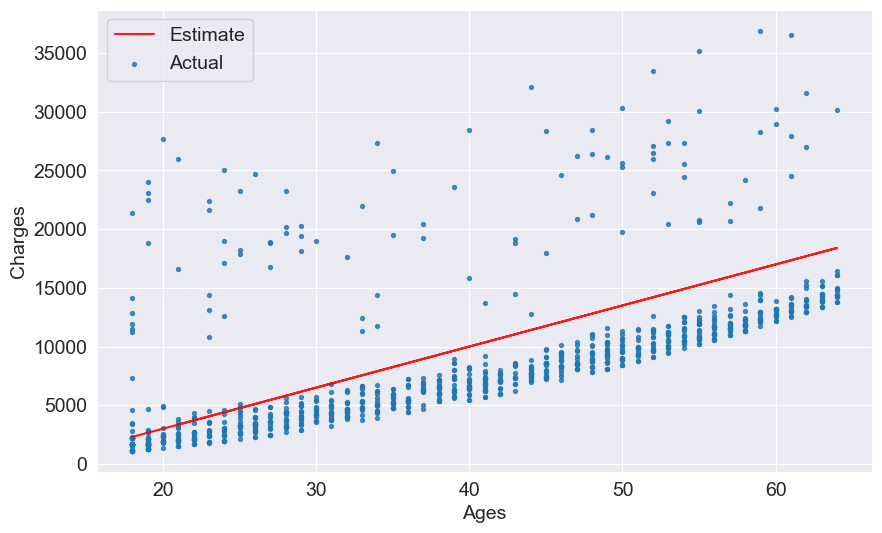

In [65]:
try_parameters(350,-4000)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()

In [68]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [69]:
inputs = non_smoker_df[['age']] #Input has to be of two dimensions
targets = non_smoker_df.charges
print("Input shape:" ,inputs.shape)
print("Targets shape:", targets.shape)
inputs

Input shape: (1064, 1)
Targets shape: (1064,)


,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [70]:
model.fit(inputs , targets)


LinearRegression()

In [71]:
model.predict(np.array([[23],[37],[61]]))

c:\Users\Admin\OneDrive\Desktop\Python\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [72]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [73]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [74]:
rsme(targets, predictions)

np.float64(4662.505766636395)

In [75]:
model.coef_

array([267.24891283])

In [76]:
model.intercept_

np.float64(-2091.4205565650864)

RSME Loss: 4662.516524487403


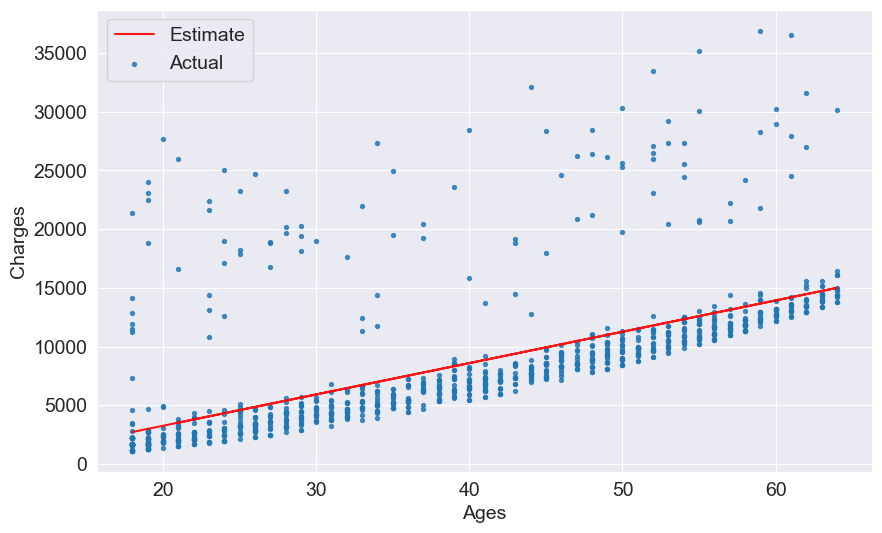

In [77]:
try_parameters(267,-2091)

RSME Loss: 4662.505766636395


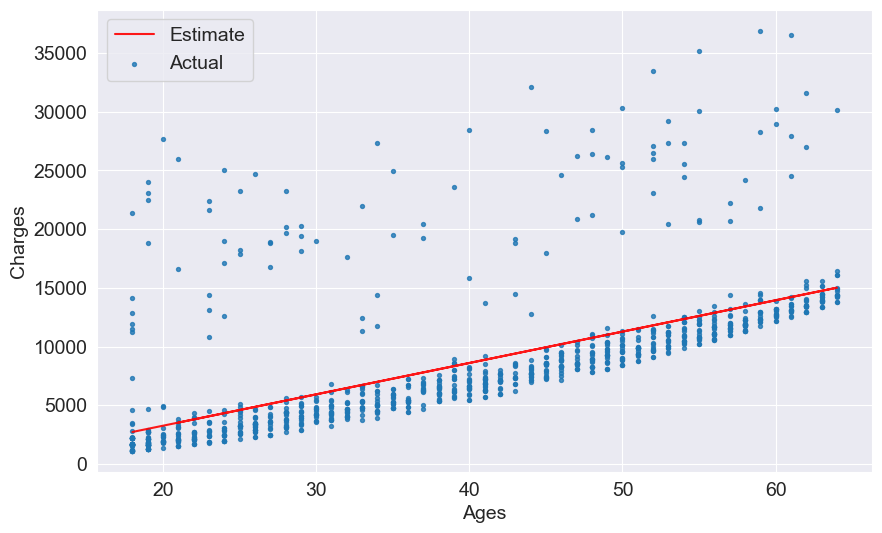

In [78]:
try_parameters(model.coef_ , model.intercept_)

In [79]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()

In [80]:
model.fit(inputs, targets)

SGDRegressor()

RSME Loss: 4960.1751679654035


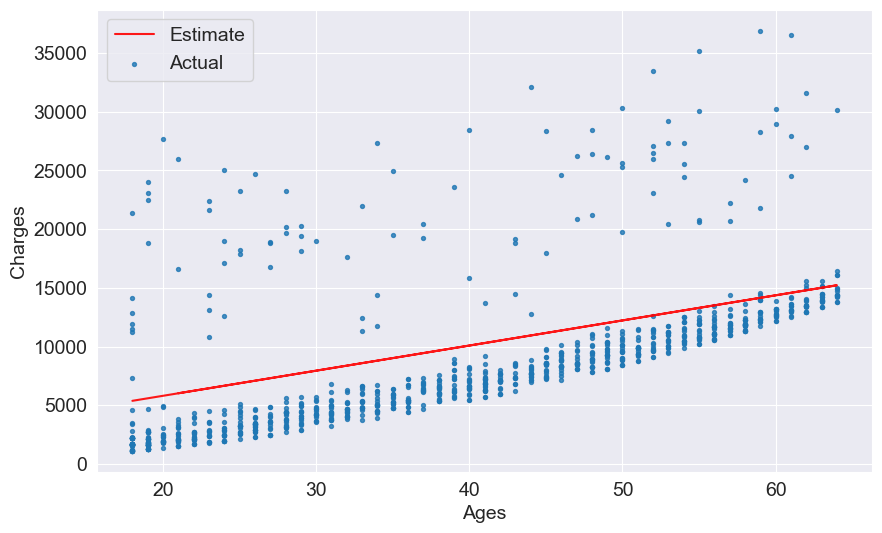

In [81]:
try_parameters(model.coef_, model.intercept_)

In [82]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [83]:
model = LinearRegression()
inputs = smoker_df[['age']]
targets = smoker_df.charges


In [84]:
model.fit(inputs , targets)


LinearRegression()

In [85]:
def try_parameters(w,b):
    ages = smoker_df.age
    target = smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages,target, s=8, alpha=0.8)
    plt.xlabel('Ages')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])

    loss = rsme(target, predictions)
    print("RSME Loss:", loss)

RSME Loss: 10711.00334810241


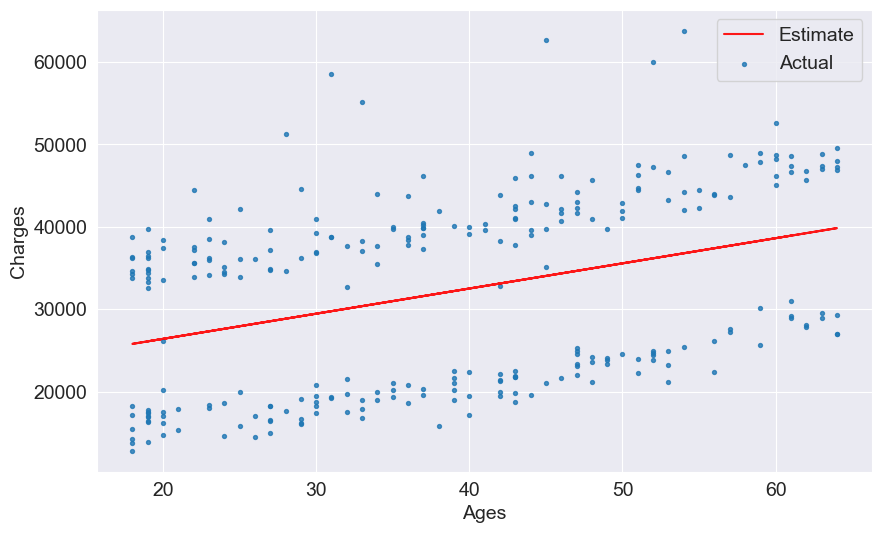

In [86]:
try_parameters(model.coef_,model.intercept_)

In [87]:
inputs , targets = non_smoker_df[['age','bmi']] , non_smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)


np.float64(4662.3128354612945)

In [88]:
non_smoker_df.charges.corr(non_smoker_df.children)
    

np.float64(0.13892870453542183)

In [89]:
fig = px.strip(non_smoker_df, x='children' ,y='charges', title='Children vs. Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()


In [90]:
inputs , targets = non_smoker_df[['age','bmi','children']] , non_smoker_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)


np.float64(4608.470405038247)

In [91]:
inputs , targets = medical_df[['age','bmi']] , medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)


np.float64(11374.110466839007)

In [92]:
px.scatter(medical_df,x='age',y='charges', color='smoker')


<Axes: xlabel='smoker', ylabel='charges'>

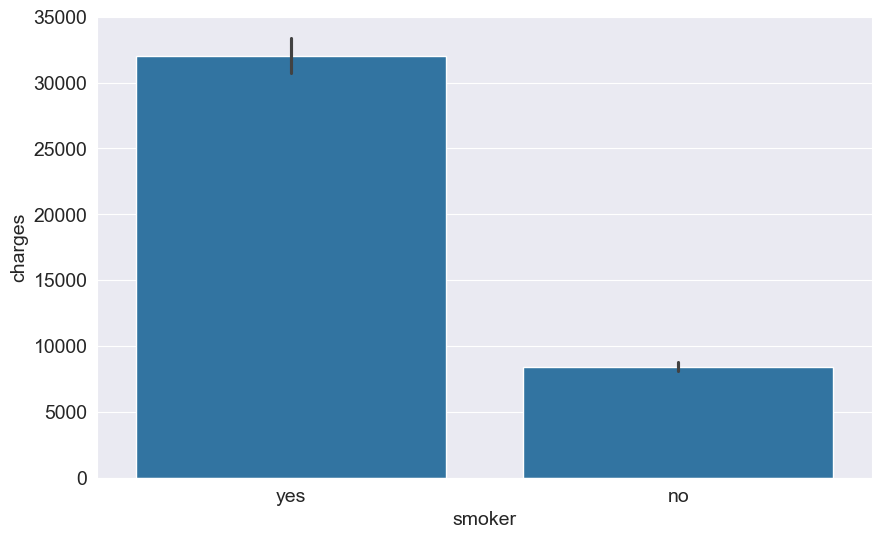

In [93]:
sns.barplot(data=medical_df,x='smoker', y='charges')


In [94]:
somker_codes = {'no' : 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(somker_codes)
medical_df.charges.corr(medical_df.smoker_code)


np.float64(0.7872514304984782)

In [95]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [96]:
inputs , targets = medical_df[['age','bmi','children','smoker_code']] , medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)


np.float64(6056.439217188081)

<Axes: xlabel='sex', ylabel='charges'>

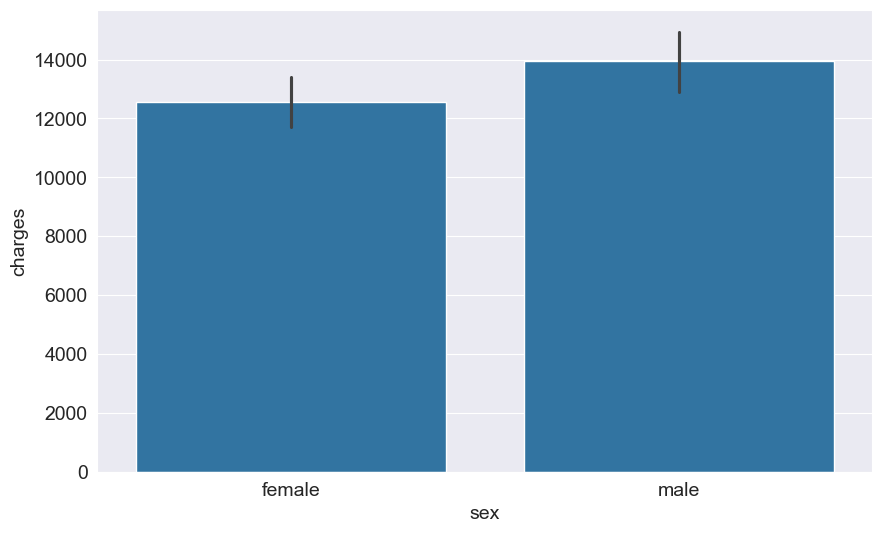

In [97]:
sns.barplot(data=medical_df,x='sex', y='charges')

In [98]:
sex_codes = {'female' : 0, 'male' : 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.05729206220202531)

In [99]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [100]:
inputs , targets = medical_df[['age','bmi','children','smoker_code','sex_code']] , medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)


np.float64(6056.100708754546)

<Axes: xlabel='region', ylabel='charges'>

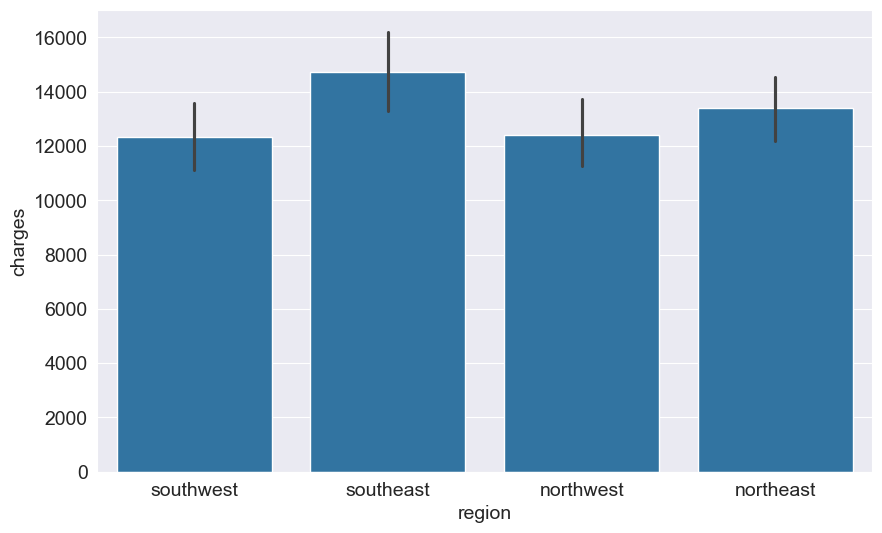

In [101]:
sns.barplot(data=medical_df,x='region', y='charges')

In [102]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [103]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [104]:
medical_df[['northeast','northwest','southeast','southwest']]= one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [114]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast','northwest','southeast','southwest']
inputs, targets = medical_df[input_cols], medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)


np.float64(6041.6796511744515)

In [106]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [107]:
medical_df[medical_df['smoker_code'] == 1]

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
11,62,female,26.290,0,yes,southeast,27808.72510,1,0,0.0,0.0,1.0,0.0
14,27,male,42.130,0,yes,southeast,39611.75770,1,1,0.0,0.0,1.0,0.0
19,30,male,35.300,0,yes,southwest,36837.46700,1,1,0.0,0.0,0.0,1.0
23,34,female,31.920,1,yes,northeast,37701.87680,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,1,0,0.0,0.0,0.0,1.0
1314,30,female,23.655,3,yes,northwest,18765.87545,1,0,0.0,1.0,0.0,0.0
1321,62,male,26.695,0,yes,northeast,28101.33305,1,1,1.0,0.0,0.0,0.0
1323,42,female,40.370,2,yes,southeast,43896.37630,1,0,0.0,0.0,1.0,0.0


In [108]:
new_smoker = medical_df[medical_df['smoker_code'] == 1]
new_smoker

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
11,62,female,26.290,0,yes,southeast,27808.72510,1,0,0.0,0.0,1.0,0.0
14,27,male,42.130,0,yes,southeast,39611.75770,1,1,0.0,0.0,1.0,0.0
19,30,male,35.300,0,yes,southwest,36837.46700,1,1,0.0,0.0,0.0,1.0
23,34,female,31.920,1,yes,northeast,37701.87680,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,1,0,0.0,0.0,0.0,1.0
1314,30,female,23.655,3,yes,northwest,18765.87545,1,0,0.0,1.0,0.0,0.0
1321,62,male,26.695,0,yes,northeast,28101.33305,1,1,1.0,0.0,0.0,0.0
1323,42,female,40.370,2,yes,southeast,43896.37630,1,0,0.0,0.0,1.0,0.0


In [109]:
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast','northwest','southeast','southwest']
inputs, targets = new_smoker[input_cols], new_smoker.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)

np.float64(5668.4678821121515)

In [110]:
medical_df.bmi.corr(medical_df.smoker_code)

np.float64(0.0037504259049803844)

In [111]:
no_smoker = medical_df[medical_df['smoker_code'] == 0]
no_smoker

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
5,31,female,25.740,0,no,southeast,3756.62160,0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0,0,0.0,0.0,0.0,1.0
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0


In [112]:
input_cols = ['age', 'bmi', 'children', 'sex_code', 'northeast','northwest','southeast','southwest']
inputs, targets = no_smoker[input_cols], no_smoker.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)

np.float64(4573.074988795492)

In [115]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [116]:
model.intercept_

np.float64(-12525.547811195444)

In [118]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols,'bias'),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,bias,-12525.547811


In [140]:
from sklearn.preprocessing import StandardScaler


In [141]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [124]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [125]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [142]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [128]:
scaled_inputs.mean

<function ndarray.mean>

In [129]:
scaled_inputs.mean()

np.float64(-1.4515322454491333e-16)

In [143]:
cat_cols = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values
categorical_data


array([[1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]], shape=(1338, 6))

In [151]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis=1)
targets = medical_df.charges
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
rsme(targets, predictions)


np.float64(6041.679651174452)

In [145]:
model.intercept_

np.float64(8466.48321541183)

In [146]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols+cat_cols,1),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df.sort_values('weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [147]:
from sklearn.model_selection import train_test_split

In [153]:
inputs

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]], shape=(1338, 9))

In [156]:
inputs_train , inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [155]:
inputs.shape

(1338, 9)

In [165]:
model = LinearRegression().fit(inputs_train, targets_train)
predictions = model.predict(inputs_test)
rsme(targets_test, predictions)

np.float64(5537.9485769631665)

In [168]:
predictions = model.predict(inputs_train)
rsme(targets_train, predictions)

np.float64(6097.737395006291)